In [15]:
!pip install catboost

  Using cached catboost-1.2.7.tar.gz (71.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [147 lines of output]
    Using cached setuptools-75.5.0-py3-none-any.whl.metadata (6.8 kB)
    Using cached wheel-0.45.0-py3-none-any.whl.metadata (2.3 kB)
    Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
    Using cached conan-1.65.0.tar.gz (789 kB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'done'
    Using cached ipython-8.29.0-py3-none-any.whl.metadata (5.0 kB)
    Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
    Using cached tornado-6.4.1-cp38-abi3-win_amd64.whl.metadata (2.6 kB)
    Using cached jupyter_core-5.7.2-py3-none-a

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [9]:
df = pd.read_csv('./transaction_dataset.csv')
df

,id,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Convert non-numeric columns using one-hot encoding
non_numeric_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['Index', 'FLAG','id'])  # Drop non-relevant columns if needed
y = df['FLAG']

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# KNN

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import time

# Load the dataset
df = pd.read_csv('./transaction_dataset.csv')

# Assume 'FLAG' is the target column, and all others are features.
X = df.drop(columns=['id', 'Index', 'FLAG', 'Address', ' ERC20_most_rec_token_type', ' ERC20 most sent token type'])  # Exclude 'FLAG' and 'Address' as features
y = df['FLAG']  # Target column: fraud or not fraud (1 for fraud, 0 for not fraud)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the data (important for KNN to perform well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Measure the training time
start_time = time.time()
knn.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Make predictions on the test set
predictions = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Print results
print(f"Training Time: {training_time:.4f} seconds")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")


Training Time: 0.0022 seconds
Accuracy: 0.9614017267648552
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1542
           1       0.94      0.88      0.91       427

    accuracy                           0.96      1969
   macro avg       0.95      0.93      0.94      1969
weighted avg       0.96      0.96      0.96      1969

Confusion Matrix:
[[1516   26]
 [  50  377]]


<Figure size 600x400 with 0 Axes>

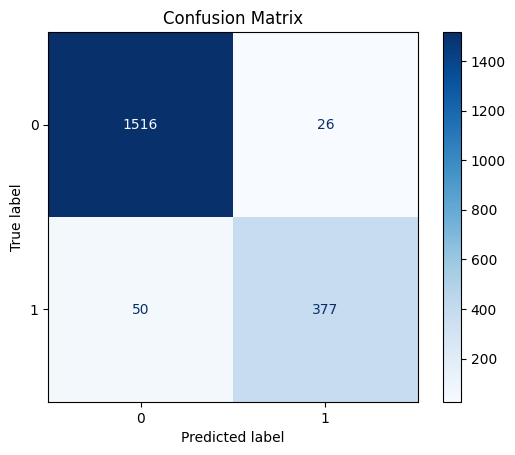

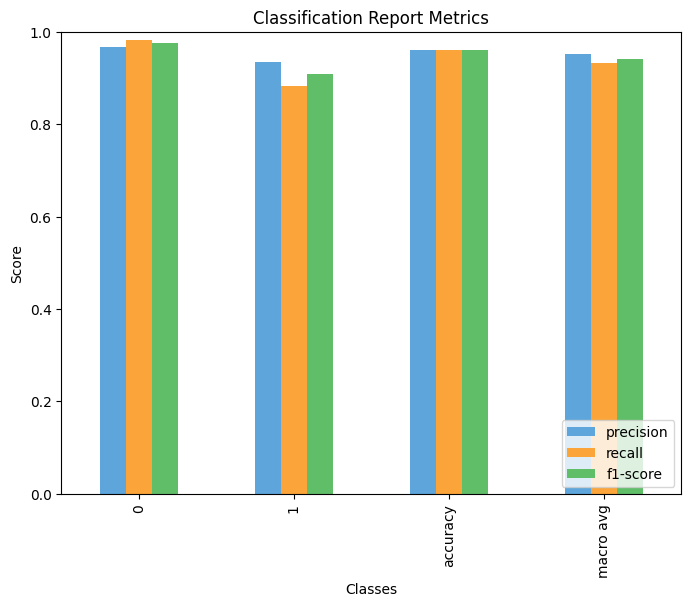

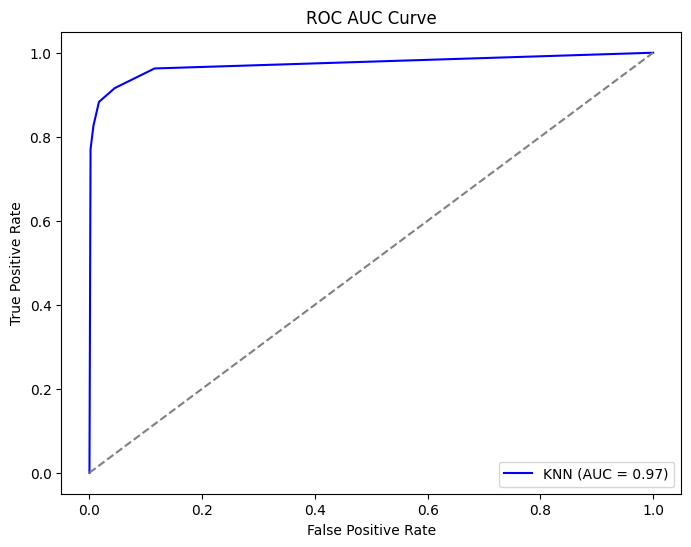

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_).plot(cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

# Plot classification report metrics as bar chart
report = classification_report(y_test, predictions, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, and F1-Score for each class
metrics_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6), color=['#5DA5DA', '#FAA43A', '#60BD68'])
plt.title('Classification Report Metrics')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (fraud)
y_probs = knn.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
plt.title('ROC AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Decision Tree

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training Time: 3.1500 seconds
Hypertuned Decision Tree Accuracy: 0.973082783138649
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1542
           1       0.95      0.93      0.94       427

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

Confusion Matrix:
[[1519   23]
 [  30  397]]


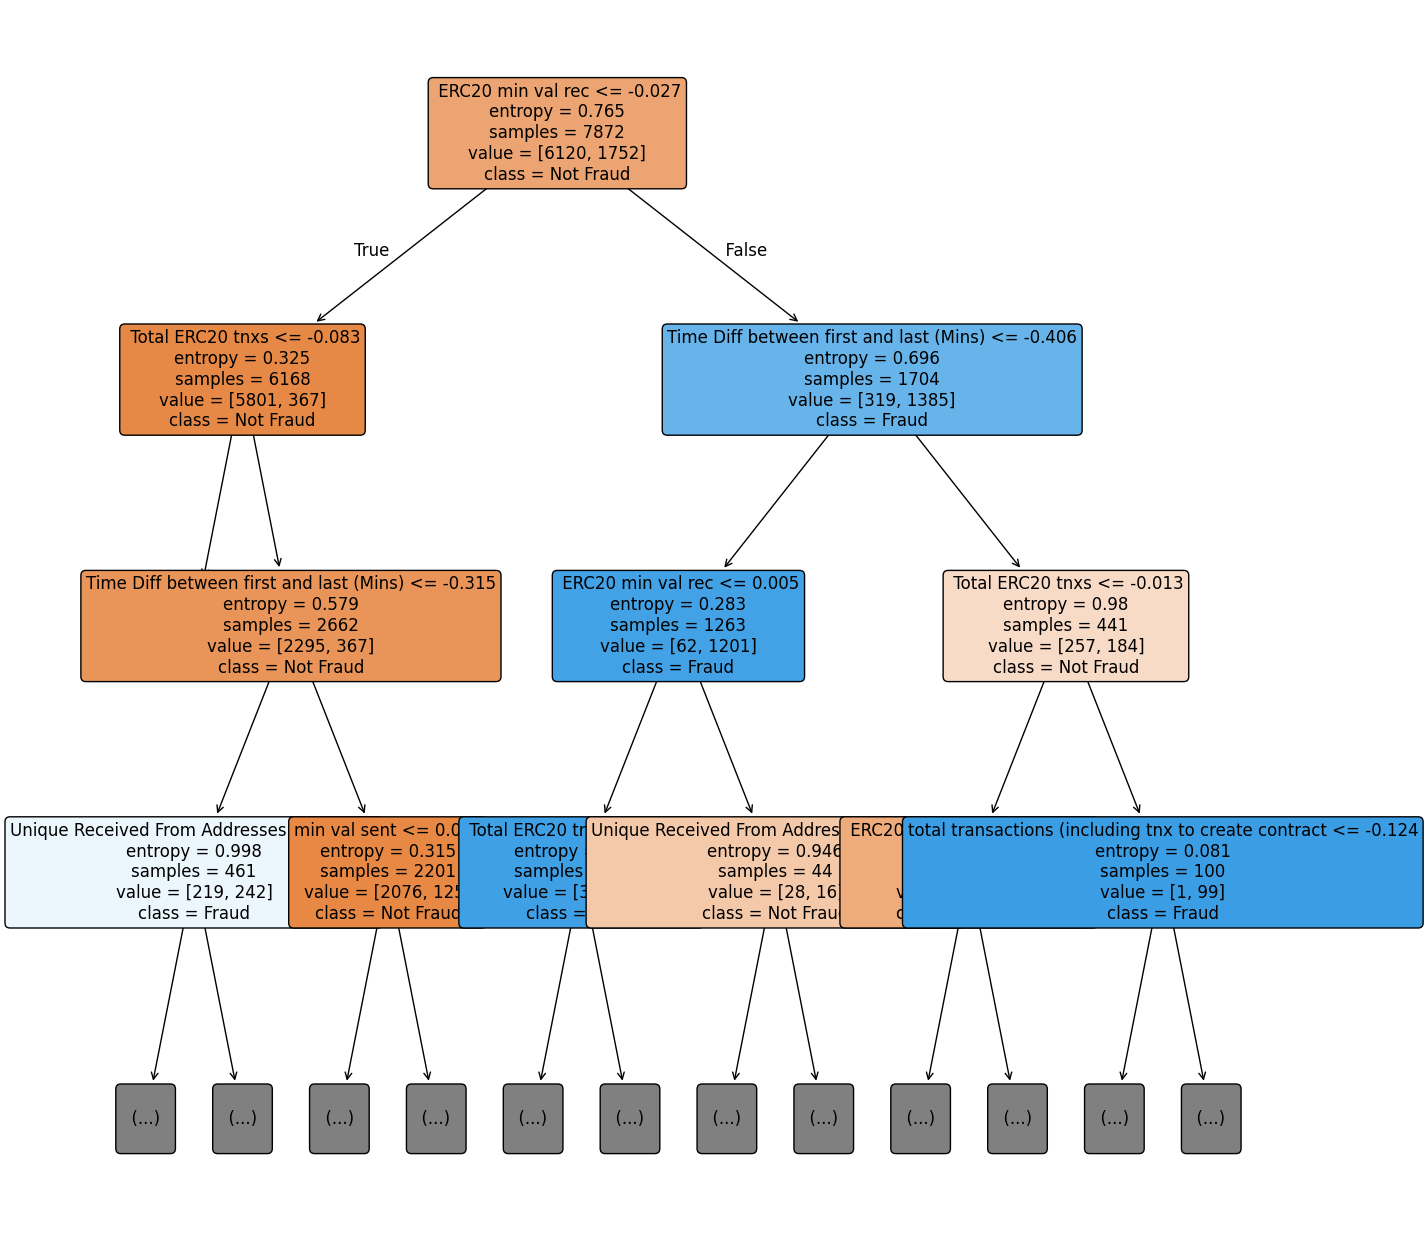

C:\Users\rumma\AppData\Local\Temp\ipykernel_768\76897026.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


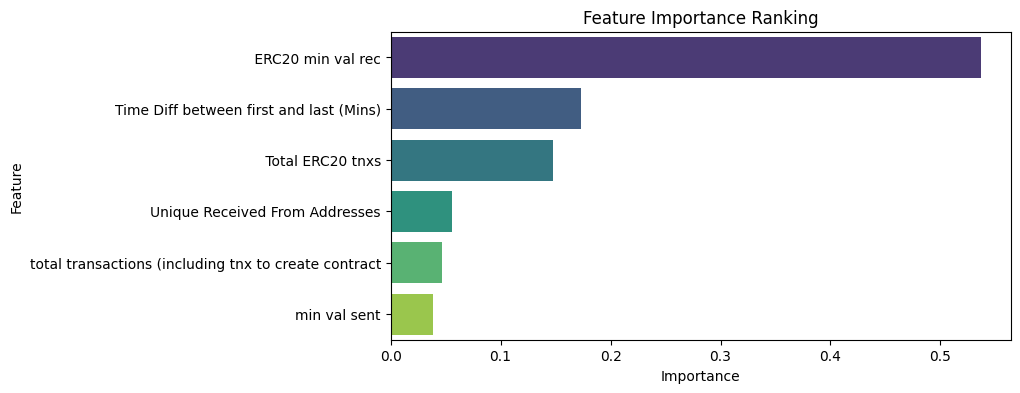

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./transaction_dataset.csv')

# Define selected features based on specified headers
selected_features = [
    ' ERC20 min val rec', 
    'Time Diff between first and last (Mins)', 
    ' Total ERC20 tnxs', 
    'Unique Received From Addresses', 
    'min val sent',
    'total transactions (including tnx to create contract'
]

# Use only the selected features for X and define y as the target column
X = df[selected_features]
y = df['FLAG']  # Target column: fraud or not fraud (1 for fraud, 0 for not fraud)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Get the best estimator from GridSearchCV
best_decision_tree = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_predictions = best_decision_tree.predict(X_test_scaled)
accuracy = accuracy_score(y_test, best_predictions)
class_report = classification_report(y_test, best_predictions)
conf_matrix = confusion_matrix(y_test, best_predictions)

print(f"Training Time: {training_time:.4f} seconds")
# Print evaluation results
print(f"Hypertuned Decision Tree Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualize the Decision Tree
plt.figure(figsize=(15, 16))
plot_tree(best_decision_tree, filled=True, feature_names=selected_features, class_names=['Not Fraud', 'Fraud'], rounded=True, fontsize=12,max_depth=3)
plt.show()

# Get feature importances
feature_importances = best_decision_tree.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# CAT Booster

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from catboost import CatBoostClassifier

import numpy as np

# Load the dataset
df = pd.read_csv('./data/transaction_dataset.csv')

# Assume 'FLAG' is the target column, and all others are features.
X = df.drop(columns=['id', 'Index', 'FLAG', 'Address', ' ERC20_most_rec_token_type', ' ERC20 most sent token type']) # Exclude 'FLAG' and 'Address' as features
y = df['FLAG']  # Target column: fraud or not fraud (1 for fraud, 0 for not fraud)

# Handle class imbalance by upsampling the minority class
X_upsampled, y_upsampled = resample(X[y == 1], y[y == 1], 
                                    replace=True, 
                                    n_samples=X[y == 0].shape[0], 
                                    random_state=42)
X_balanced = np.vstack([X[y == 0], X_upsampled])
y_balanced = np.hstack([y[y == 0], y_upsampled])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_balanced)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_balanced, test_size=0.2, random_state=42)

# Standardize the data (important for many classifiers, but CatBoost is generally robust to unscaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize CatBoost model
catboost = CatBoostClassifier(learning_rate=0.1, depth=6, random_state=42, verbose=0)  # Basic parameters
start_time = time.time()
# Fit the model on the training data
catboost.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Make predictions on the test set
predictions = catboost.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Training Time: {training_time:.4f} seconds")
# Print results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Cross-validation for better evaluation
cross_val_accuracy = cross_val_score(catboost, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-validation Accuracy: {cross_val_accuracy}")


ModuleNotFoundError: No module named 'catboost'

# Ada Boost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('./transaction_dataset.csv')

# Assume 'FLAG' is the target column, and all others are features.
X = df.drop(columns=['id','Index','FLAG', 'Address',' ERC20_most_rec_token_type',' ERC20 most sent token type'])  # Exclude 'FLAG' and 'Address' as features
y = df['FLAG']  # Target column: fraud or not fraud (1 for fraud, 0 for not fraud)

# Handle class imbalance by upsampling the minority class
X_upsampled, y_upsampled = resample(X[y == 1], y[y == 1], 
                                    replace=True, 
                                    n_samples=X[y == 0].shape[0], 
                                    random_state=42)
X_balanced = np.vstack([X[y == 0], X_upsampled])
y_balanced = np.hstack([y[y == 0], y_upsampled])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_balanced)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_balanced, test_size=0.2, random_state=42)

# Standardize the data (important for many classifiers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize AdaBoost model with default settings
adaboost = AdaBoostClassifier(n_estimators=200, random_state=46)  # You can tune n_estimators and learning_rate
start_time = time.time()
# Fit the model on the training data
adaboost.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Make predictions on the test set
predictions = adaboost.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Training Time: {training_time:.4f} seconds")
# Print results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Cross-validation for better evaluation
cross_val_accuracy = cross_val_score(adaboost, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-validation Accuracy: {cross_val_accuracy}")


C:\Users\rumma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Time: 8.2636 seconds
Accuracy: 0.9876019575856444
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1530
           1       0.98      0.99      0.99      1535

    accuracy                           0.99      3065
   macro avg       0.99      0.99      0.99      3065
weighted avg       0.99      0.99      0.99      3065

Confusion Matrix:
[[1501   29]
 [   9 1526]]


C:\Users\rumma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rumma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rumma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rumma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Cross-validation Accuracy: 0.9860512039231581


# XGB

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('./transaction_dataset.csv')

# Assume 'FLAG' is the target column, and all others are features.
X = df.drop(columns=['id', 'Index', 'FLAG', 'Address', ' ERC20_most_rec_token_type', ' ERC20 most sent token type'])
y = df['FLAG']  # Target column: fraud or not fraud (1 for fraud, 0 for not fraud)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBClassifier with the best parameters
xgb_model = XGBClassifier(
    colsample_bytree=0.9,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=300,
    subsample=1,
    random_state=42
)

start_time = time.time()
# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Make predictions on the test set
predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Training Time: {training_time:.4f} seconds")
# Print results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")


Training Time: 3.3702 seconds
Accuracy: 0.9857795835449467
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1542
           1       0.97      0.96      0.97       427

    accuracy                           0.99      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.99      0.99      0.99      1969

Confusion Matrix:
[[1530   12]
 [  16  411]]


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from catboost import CatBoostClassifier

import numpy as np

# Load the dataset
df = pd.read_csv('./transaction_dataset.csv')

# Assume 'FLAG' is the target column, and all others are features.
X = df.drop(columns=['id', 'Index', 'FLAG', 'Address', ' ERC20_most_rec_token_type', ' ERC20 most sent token type']) # Exclude 'FLAG' and 'Address' as features
y = df['FLAG']  # Target column: fraud or not fraud (1 for fraud, 0 for not fraud)

# Handle class imbalance by upsampling the minority class
X_upsampled, y_upsampled = resample(X[y == 1], y[y == 1], 
                                    replace=True, 
                                    n_samples=X[y == 0].shape[0], 
                                    random_state=42)
X_balanced = np.vstack([X[y == 0], X_upsampled])
y_balanced = np.hstack([y[y == 0], y_upsampled])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_balanced)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_balanced, test_size=0.2, random_state=42)

# Standardize the data (important for many classifiers, but CatBoost is generally robust to unscaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize CatBoost model
catboost = CatBoostClassifier(learning_rate=0.1, depth=6, random_state=42, verbose=0)  # Basic parameters

# Fit the model on the training data
catboost.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = catboost.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Cross-validation for better evaluation
cross_val_accuracy = cross_val_score(catboost, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-validation Accuracy: {cross_val_accuracy}")


ModuleNotFoundError: No module named 'catboost'

# Random Forest

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('./transaction_dataset.csv')

# Assume 'FLAG' is the target column, and all others are features.
X = df.drop(columns=['id', 'Index', 'FLAG', 'Address', ' ERC20_most_rec_token_type', ' ERC20 most sent token type'])
y = df['FLAG']  # Target column: fraud or not fraud (1 for fraud, 0 for not fraud)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model with best hyperparameters
random_forest = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)
start_time = time.time()
# Fit the model to the training data
random_forest.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Make predictions on the test set
predictions = random_forest.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Training Time: {training_time:.4f} seconds")
# Print results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")


Training Time: 6.0784 seconds
Accuracy: 0.9847715736040609
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       764
           1       0.99      0.94      0.97       221

    accuracy                           0.98       985
   macro avg       0.99      0.97      0.98       985
weighted avg       0.98      0.98      0.98       985

Confusion Matrix:
[[762   2]
 [ 13 208]]


# VOTINg

In [19]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a voting classifier (soft voting)
voting_soft = VotingClassifier(estimators=[
    ('catboost', catboost),
    ('random_forest', random_forest),
    ('xgb_model', xgb_model),
], voting='soft')

start_time = time.time()
# Fit the soft voting classifier
voting_soft.fit(X_train, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Get predictions
soft_voting_predictions = voting_soft.predict(X_test)

print(f"Training Time: {training_time:.4f} seconds")
# Accuracy
accuracy = accuracy_score(y_test, soft_voting_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, soft_voting_predictions, average='weighted')
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, soft_voting_predictions, average='weighted')
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, soft_voting_predictions, average='weighted')
print(f"F1 Score: {f1:.4f}")

# ROC AUC (for binary classification)
# If you're doing binary classification, you can calculate the AUC score
if len(set(y_test)) == 2:  # binary classification check
    roc_auc = roc_auc_score(y_test, voting_soft.predict_proba(X_test)[:, 1])
    print(f"ROC AUC: {roc_auc:.4f}")


NameError: name 'catboost' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report, confusion_matrix

# Confusion Matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix(y_test, soft_voting_predictions), display_labels=['Not Fraud', 'Fraud']).plot(cmap="Blues")
plt.title("Confusion Matrix for Voting Classifier")
plt.show()

# ROC Curve (for binary classification)
if len(set(y_test)) == 2:  # binary classification check
    y_probs = voting_soft.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
    plt.title('ROC Curve for Voting Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Classification Report Metrics
report = classification_report(y_test, soft_voting_predictions, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, and F1-Score for each class
metrics_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10, 6), color=['#5DA5DA', '#FAA43A', '#60BD68'])
plt.title('Classification Report Metrics for Voting Classifier')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

